In [1]:
!python -m pip install numpy
!python -m pip install pandas
!python -m pip install matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Load the Auto dataset in a DataFrame using Pandas

In [4]:
data = pd.read_csv('data/auto-dataset.csv')
print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

### 1. Scatterplots between features

Text(0.5, 1.0, 'Scatter Plot of mpg vs weight')

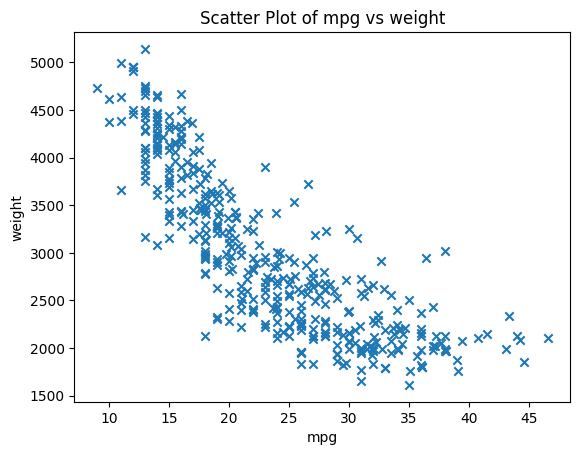

In [5]:
feat1 = data['mpg']
feat2 = data['weight']
plt.figure()
plt.scatter(feat1, feat2, marker='x')
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('Scatter Plot of mpg vs weight')
#Similarly add scatter plots for every pair of features

In [6]:
# Plot the feature plots to observe the relationships between all the predictors

In [7]:
def feature_pairs(features):
    for i, x in enumerate(features):
      for y in features[i+1:]:
          yield x,y


/tmp/ipykernel_38732/943010084.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


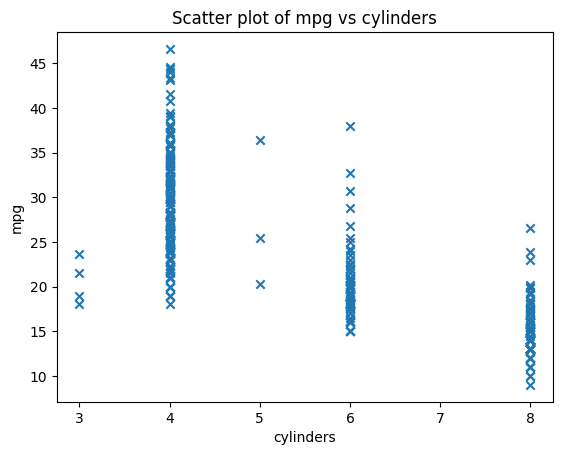

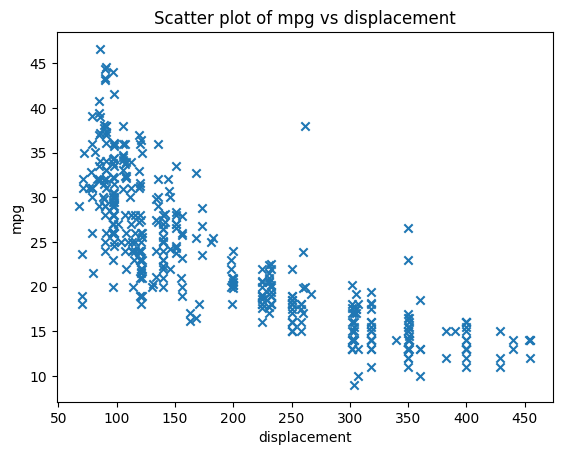

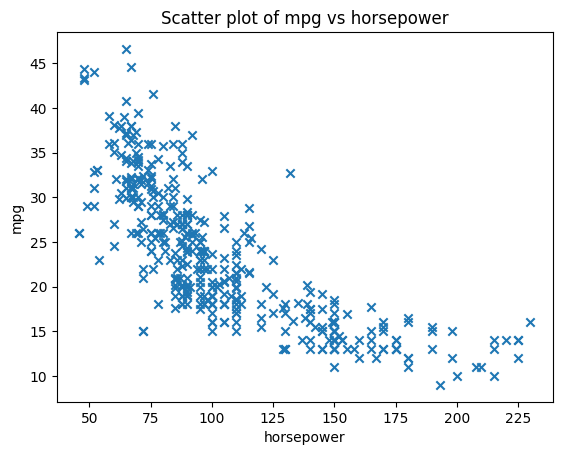

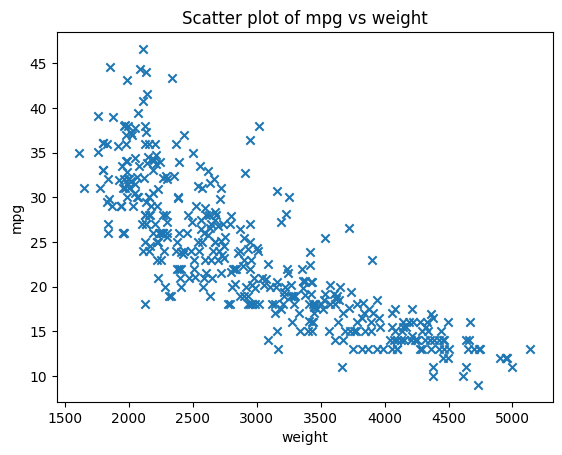

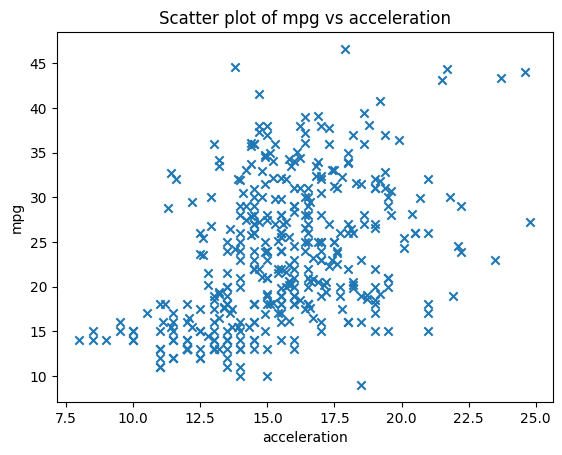

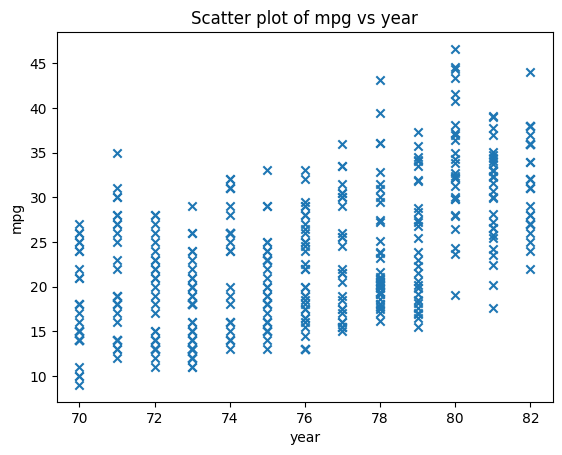

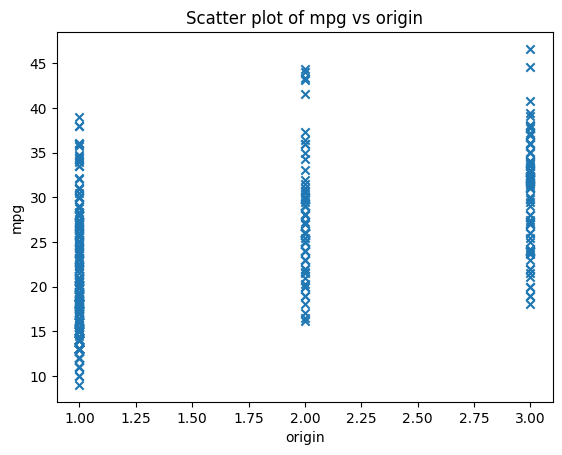

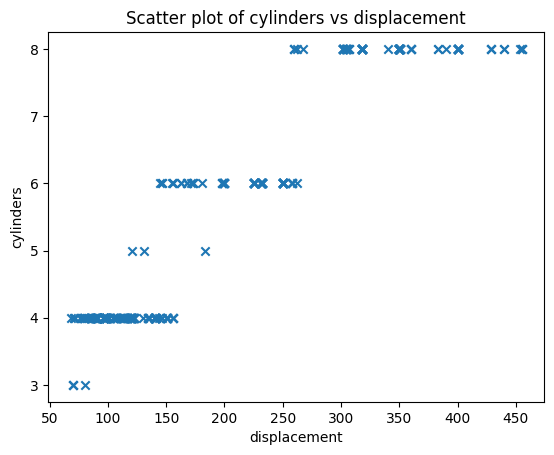

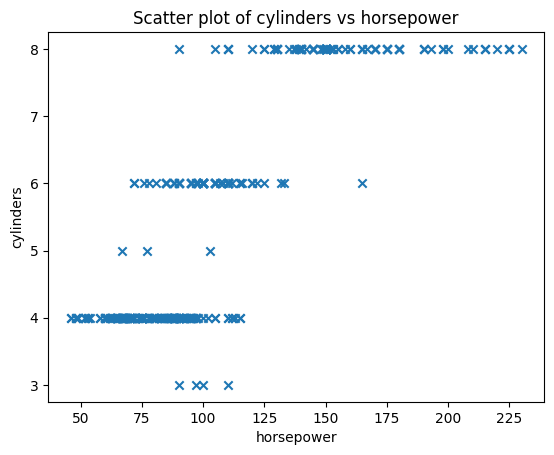

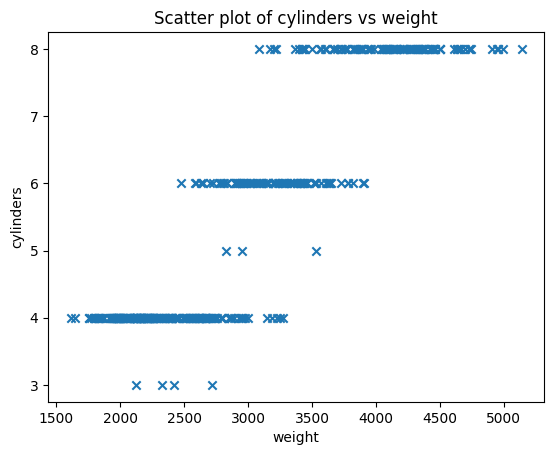

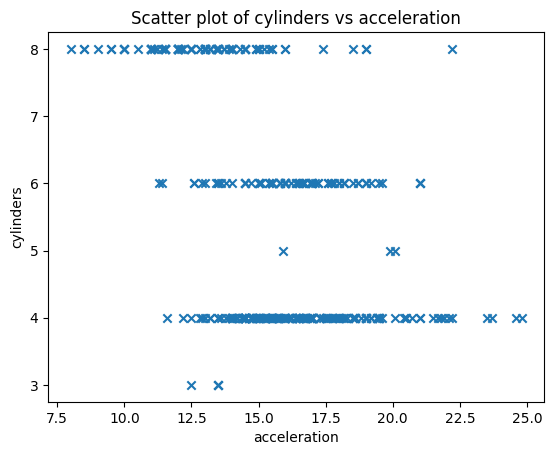

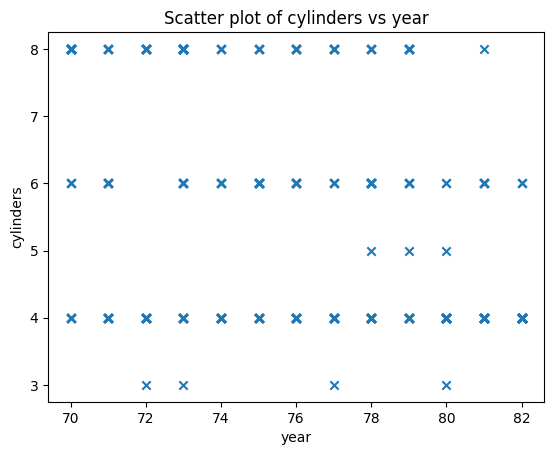

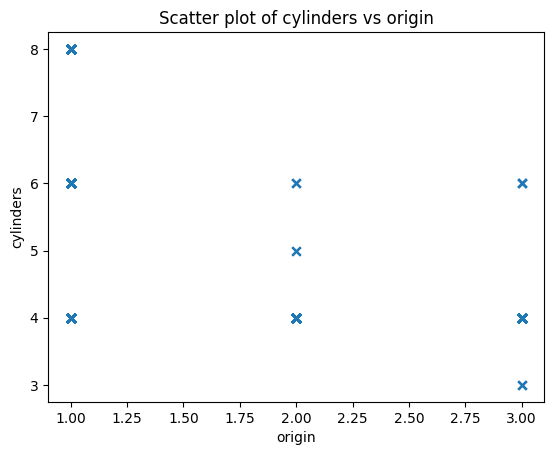

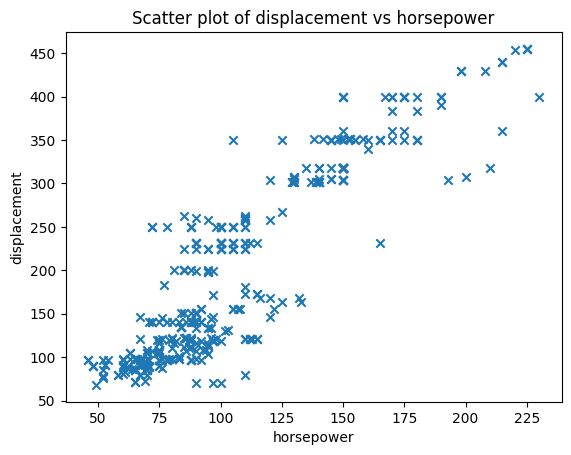

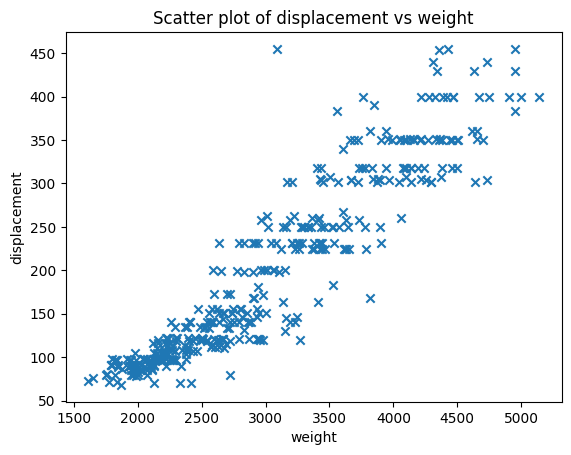

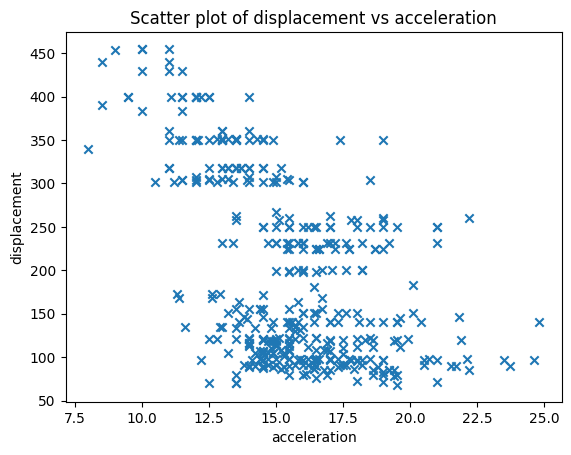

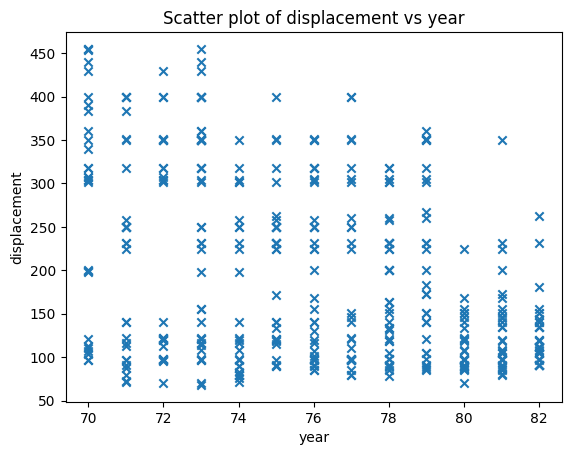

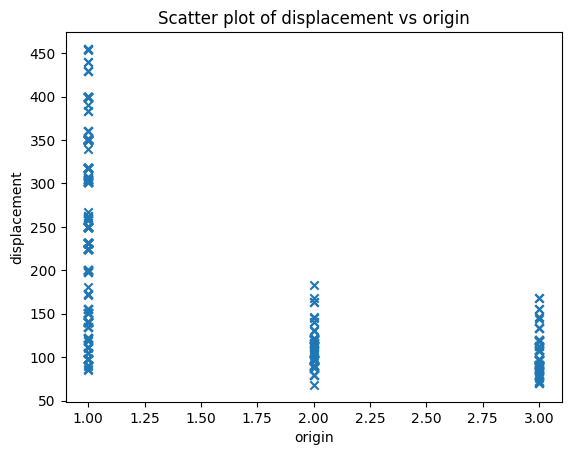

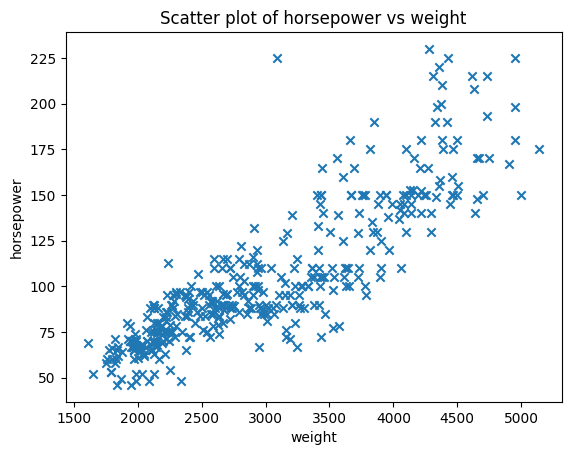

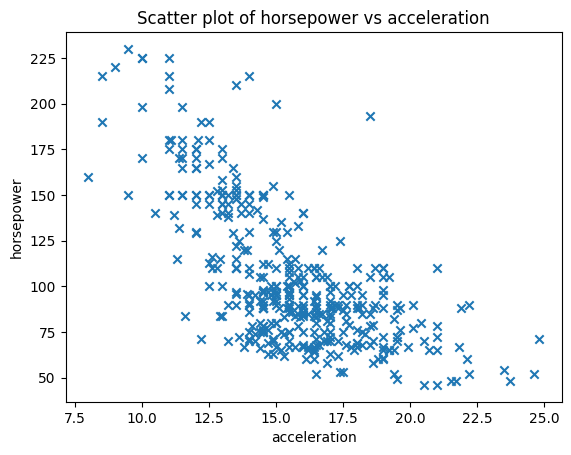

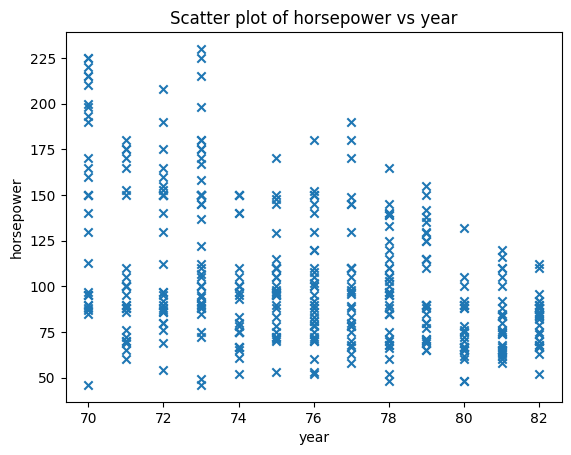

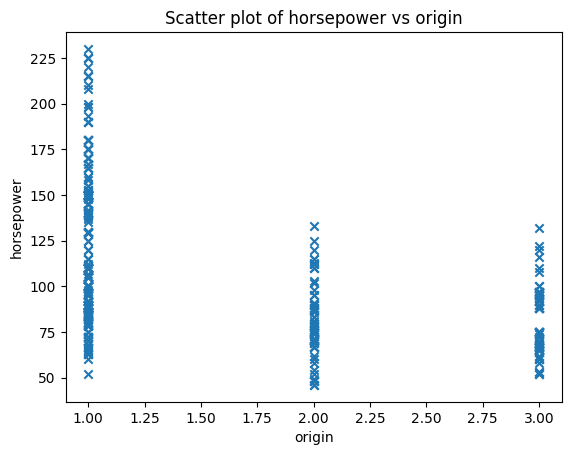

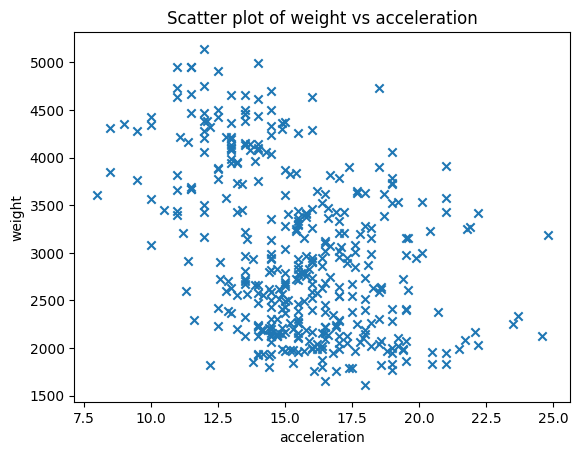

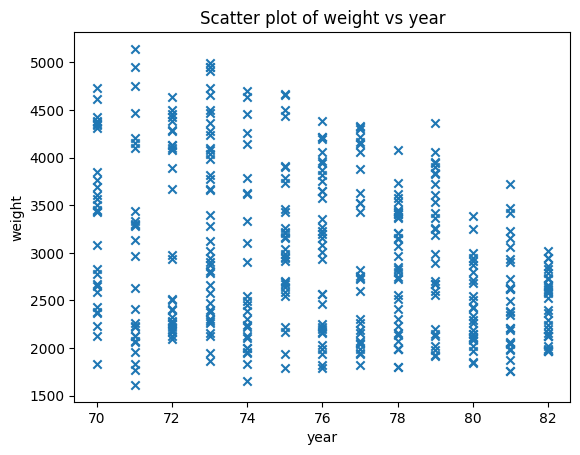

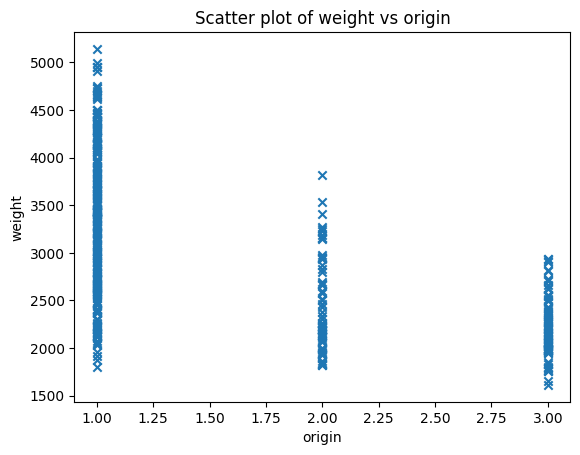

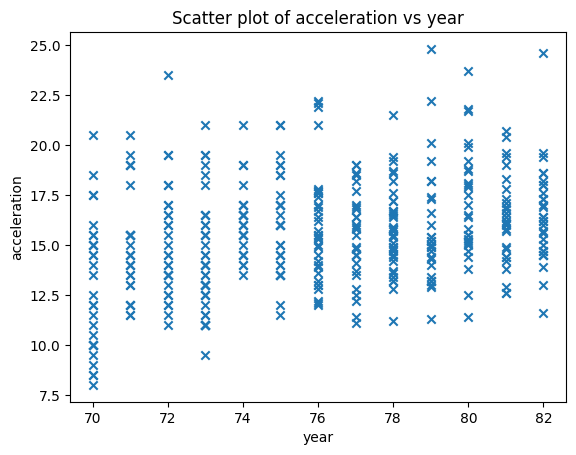

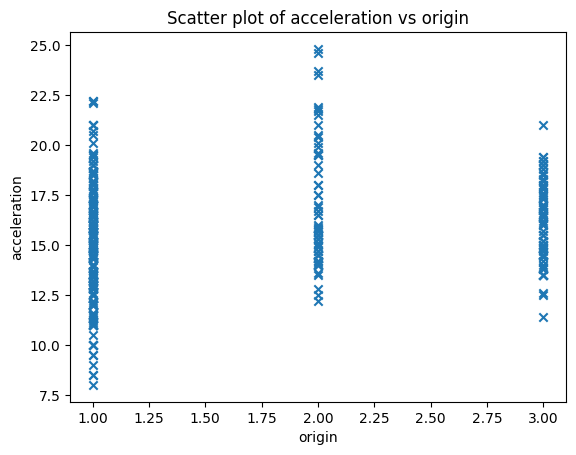

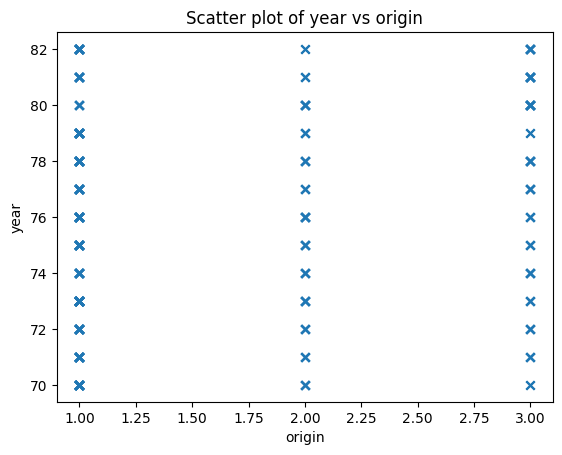

In [8]:
features = data.drop("name", axis=1).columns.to_list()
n = len(features)
def plotting(feat1, feat2, i):
  x, y = data[feat2], data[feat1]
  plt.figure()
  plt.scatter(x, y, marker='x')
  plt.xlabel(feat2)
  plt.ylabel(feat1)
  plt.title(f"Scatter plot of {feat1} vs {feat2}")
for i, (feat1, feat2) in enumerate(feature_pairs(features)):
    plotting(feat1, feat2, i)
    

##NOTE:
The are some data pairs in which the relationship between them is linear an example to those is the following two data points, which are (acceleration, hours power), (displacement, weight).
There are other data points in which the relationship between them is not-linear an example to those are (weight, year), (acceleration, year)

### 2. Correlation

In [9]:
# Use np corrcoef to observe the correlation between  predictors

__From the scatter plots__: the most highly _correlated_ variables seem to be `displacement` and `weight`. And the most highly _anti-correlated_ seem to be `mpg` and `weight`.

In [10]:
max_corr, min_corr = -1, 1
max_pos = (-1,-1)
min_pos = (-1,-1)
corrmat = np.corrcoef(data.drop("name", axis=1).T)
n = len(corrmat)
for i in range(n):
    for j in range(i+1, n):
        corr = corrmat[i,j]
        if corr > max_corr:
            max_corr = corr
            max_pos = i,j
        elif corr < min_corr:
            min_corr = corr
            min_pos = i,j
print(f"Maximum Correlation ({max_corr}): {data.columns[max_pos[0]]} with {data.columns[max_pos[1]]}")
print(f"Maximum Anti-Correlation ({min_corr}): {data.columns[min_pos[0]]} with {data.columns[min_pos[1]]}")

Maximum Correlation (0.950823300827781): cylinders with displacement
Maximum Anti-Correlation (-0.8322442148315753): mpg with weight


The result for the most highly correlated variables differs from our observation from the plots, however it does not seem to be too far off by looking at the following graphs.

Defaulting to user installation because normal site-packages is not writeable


/tmp/ipykernel_38732/622320456.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

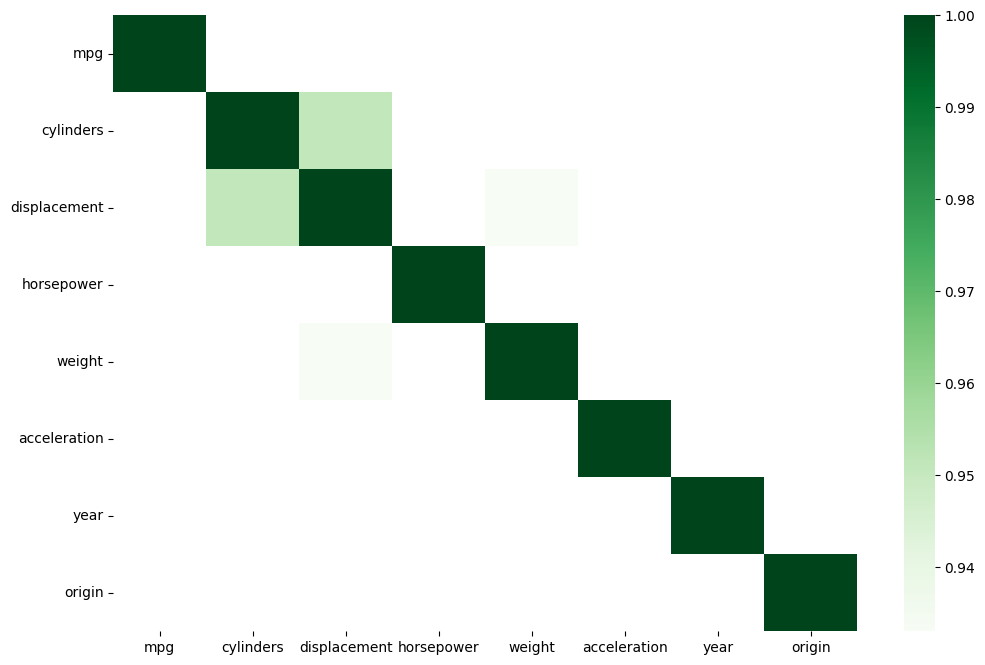

In [11]:
!pip install seaborn
import seaborn as sns
corr = data.corr()

kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

/tmp/ipykernel_38732/1065528130.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

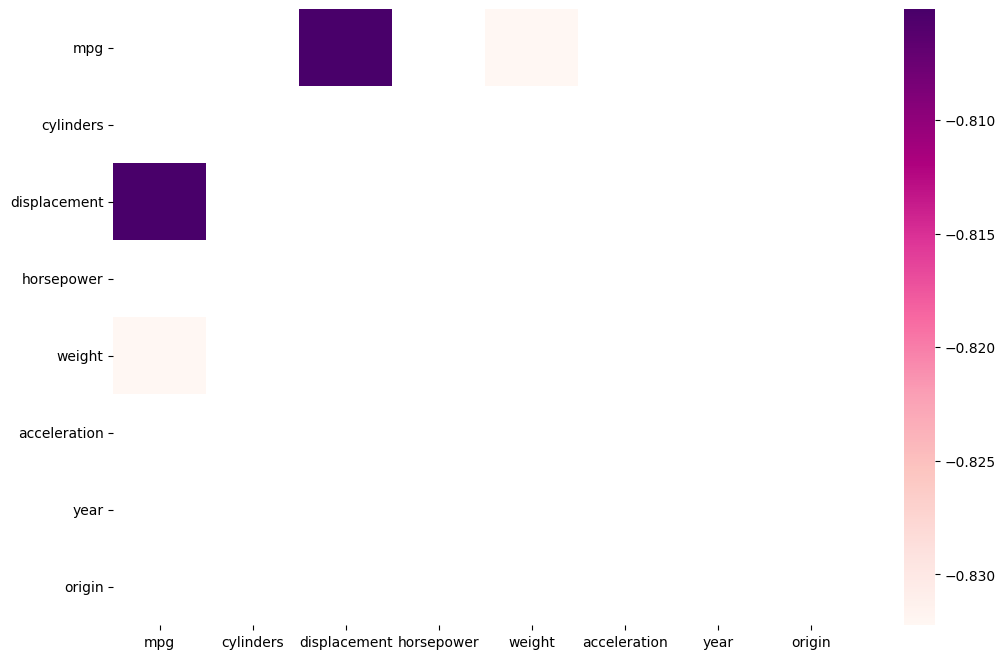

In [12]:
corr = data.corr()

kot = corr[corr<=-.8]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="RdPu")

### 3. Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

y = np.array(data['mpg'])
x = np.array(data['cylinders']).reshape((-1, 1))
print(x.shape, y.shape)
linear_model.fit(x,y)
r_sq = linear_model.score(x, y)

# Use the fit function and the score function in linear regression module of sklearn to  fit the data and observe the fit


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Fit the linear regression on mpg for the other features: cylinder, horsepower, year and displacement

In [ ]:
from scipy import stats
n = len(y)
for feature in ["cylinders", "horsepower", "year", "displacement"]:
  
  linear_model = LinearRegression()
  y = np.array(data['mpg'])
  x = np.array(data[feature]).reshape((-1, 1))
  mean_x = np.mean(x)
  linear_model.fit(x,y)
  r_sq = linear_model.score(x,y)
  predictions = linear_model.predict(x)
  rss = ((y - predictions)** 2).sum()
  
  rse_squared = rss/(n-2)
  SE_intercept = np.sqrt(rse_squared * ( (1/n) + mean_x**2 / (((x - mean_x)**2).sum())))
  SE_SLOPE = np.sqrt(rse_squared / (((x-mean_x)**2).sum()))
  t_intercept = linear_model.intercept_/SE_intercept
  t_slope = linear_model.coef_[0]/ SE_SLOPE
  # print(t_slope)
  p_intercept = stats.t.sf(np.abs(t_intercept), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)

  p_slope = stats.t.sf(np.abs(t_slope), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
  print(f"The feature is {feature} the p-slope is {p_slope} and the intercept is {p_intercept} and the r_squared is {r_sq}")
  print(f"The feature is {feature} and the r_squared is {r_sq}")


  


##NOTE:
All four predictors appeared quite important, and using p-cutoff of 1% .


The feature is cylinders and the r_squared is 0.6046889889441245
The feature is horsepower and the r_squared is 0.6059482578894348
The feature is year and the r_squared is 0.33702781330962295
The feature is displacement and the r_squared is 0.648229400319304

In [ ]:
#Multiple Linear Regression
#Create a 2D matrix with each column representing all features
#Look up np.concatenate or np.stack

#Print the predictions of the your fitted model and the weights of Linear Regression (look at the function get_params())

In [ ]:
from sklearn.linear_model import LinearRegression
df_label = data['mpg']
features = data.columns.tolist()
features =  [feat for feat in features if feat != "mpg" and feat != "name"]
print(features)
df_input = data[features]
model = LinearRegression().fit(df_input, df_label)
r_sq = model.score(df_input, df_label)
print(f"R_squared: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_} and the score is {model.score(df_input, df_label)} and get_params {model.get_params()}")


Note:
The multiple linear regression is able to achieve better fit (R<sup>2</sup>) compared to the four simple linear regression models.
If the sign is positive then this indeicated that the predictors and the response are positively correlated and if negative they are negative correlated.
Example of positive correlation is between displacement, and the negative correlation is the horse power




In [ ]:
#Make a scatter plot of the residual vs the predictions of your linear regression model

In [ ]:
feat1 = model.predict(df_input)
feat2 = df_label.tolist() - feat1
plt.figure()
plt.scatter(feat1, feat2, marker='x')
plt.xlabel('model predictions')
plt.ylabel('residual error')
plt.title('Scatter Plot of residual error vs model prediction')

##Note:
The u shape is indication of non-linearity
